In [1]:
# Import the required library
import pandas as pd
import numpy as np

# Read the csv file
df = pd.read_csv(r"C:\Users\wojtek\Downloads\Spotify_Youtube.csv")

In [2]:
# List of required columns
required_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                   'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
                   'Duration_ms', 'Stream']

# Filter the DataFrame
df_filtered = df[required_columns]

In [3]:
# Remove rows with missing values
df_filtered = df_filtered.dropna()


In [4]:
outliers = df_filtered.select_dtypes(include='number').apply(lambda x: np.abs(x - x.mean()) > 3*x.std())
outlier_counts = outliers.sum().sort_values(ascending=False)


In [5]:
outliers = df_filtered.select_dtypes(include='number').apply(lambda x: np.abs(x - x.mean()) > 3*x.std())
df_filtered_no_outliers = df_filtered[~outliers.any(axis=1)]


In [6]:
df_filtered_no_outliers['Stream'].median()
df_filtered_no_outliers['Stream'].astype(int)

1        310083733
2         63063467
3        434663559
4        617259738
5        323850327
           ...    
20711     17125177
20712      9921887
20713      9227144
20714     10898176
20715      6226110
Name: Stream, Length: 17613, dtype: int32

In [9]:
# mediana 50958279
df_filtered_no_outliers.loc[:, 'Stream_Above_Median'] = (df_filtered_no_outliers['Stream'] > df_filtered_no_outliers['Stream'].median()).astype(int)


C:\Users\wojtek\AppData\Local\Temp\ipykernel_19992\3529002200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers.loc[:, 'Stream_Above_Median'] = (df_filtered_no_outliers['Stream'] > df_filtered_no_outliers['Stream'].median()).astype(int)


In [11]:

df_scoring = df_filtered_no_outliers.sample(n=1000, replace=False)
df_model = df_filtered_no_outliers.drop(df_scoring.index)



In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define X and y
X = df_filtered_no_outliers.drop(columns=['Stream_Above_Median',"Stream"])
y = df_filtered_no_outliers['Stream_Above_Median']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#pierwszy las
Las = RandomForestClassifier(n_estimators=100, random_state=1, min_samples_leaf=2)
Las.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=1)

In [79]:
from sklearn.metrics import accuracy_score
Y_1 = Las.predict(X_test)
Y_2 = Las.predict(X_train)
accuracy1= accuracy_score(y_test, Y_1)
accuracy2= accuracy_score(y_train, Y_2)
print(accuracy1)
print(accuracy2)

0.628441669032075
0.9999290276792051


In [17]:
#pierwsze próba randomizer

In [86]:
# Define the hyperparameter grid
n_estimators = np.linspace(50, 200, num=10, dtype=int)
max_features = ['auto', 'sqrt']
max_depth = [1, 5, 10, 20, 50, 75, 100]
min_samples_split = [2, 5, 10, 15, 20, 30]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'criterion': criterion
}

# Create the base model
rf_base = RandomForestClassifier()

# Perform randomized search for hyperparameter optimization
rf_random = RandomizedSearchCV(estimator=rf_base,
                               param_distributions=random_grid,
                               n_iter=30,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=4)

# Fit the random search model to the training data
rf_random.fit(X_train, y_train)

# Evaluate the model
train_score = rf_random.score(X_train, y_train)
test_score = rf_random.score(X_test, y_test)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Train Accuracy: 0.9943931866572037
Test Accuracy: 0.6131138234459268


In [87]:
rf_random.best_params_

{'n_estimators': 66,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': True}

In [ ]:
#kod z random grid po modyfikacjach

In [94]:
n_estimators = np.linspace(50, 250, num=10, dtype=int)
print(n_estimators)

[ 50  72  94 116 138 161 183 205 227 250]


In [17]:
# Define the hyperparameter grid
n_estimators = np.linspace(50, 250, num=10, dtype=int)
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 25, 30, 35]
min_samples_split = [2, 3, 4, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 7, 10]
bootstrap = [True]
criterion = ['gini', 'entropy']
max_leaf_nodes = [5, 10, 15, 20, 30, 40]
class_weight = ['balanced', 'balanced_subsample', None]
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'max_leaf_nodes':max_leaf_nodes,
    'criterion': criterion,
    'class_weight': class_weight

}

# Create the base model
rf_base = RandomForestClassifier()

# Perform randomized search for hyperparameter optimization
rf_random = RandomizedSearchCV(estimator=rf_base,
                               param_distributions=random_grid,
                               n_iter=200,
                               cv=5,
                               verbose=2,
                               random_state=13,
                               n_jobs=4)

# Fit the random search model to the training data
rf_random.fit(X_train, y_train)

# Evaluate the model
train_score = rf_random.score(X_train, y_train)
test_score = rf_random.score(X_test, y_test)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Train Accuracy: 0.6376863023420866
Test Accuracy: 0.5750780584728924


In [18]:
rf_random.best_params_

{'n_estimators': 183,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 40,
 'max_features': 'sqrt',
 'max_depth': 35,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [22]:
#model z wybranymi hiperparametrami
wybrany = RandomForestClassifier(n_estimators=183, random_state=1, min_samples_leaf=3, min_samples_split=5, max_features='sqrt', max_depth=35, criterion='gini', class_weight='balanced_subsample', max_leaf_nodes=40, bootstrap=True) 
wybrany.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=35,
                       max_features='sqrt', max_leaf_nodes=40,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=183, random_state=1)

In [50]:
Y_1 = wybrany.predict(X_test)
accuracy = accuracy_score(y_test, Y_1)
print(accuracy)

0.5728072665342038


In [78]:
Y_2 = wybrany.predict(X_train)
Y_1 = wybrany.predict(X_test)

In [80]:
matrix = confusion_matrix(y_test, Y_1)
print(matrix)
matrix2= confusion_matrix(y_train, Y_2)
print(matrix2)

[[1110  680]
 [ 629 1104]]
[[7017    0]
 [   1 7072]]


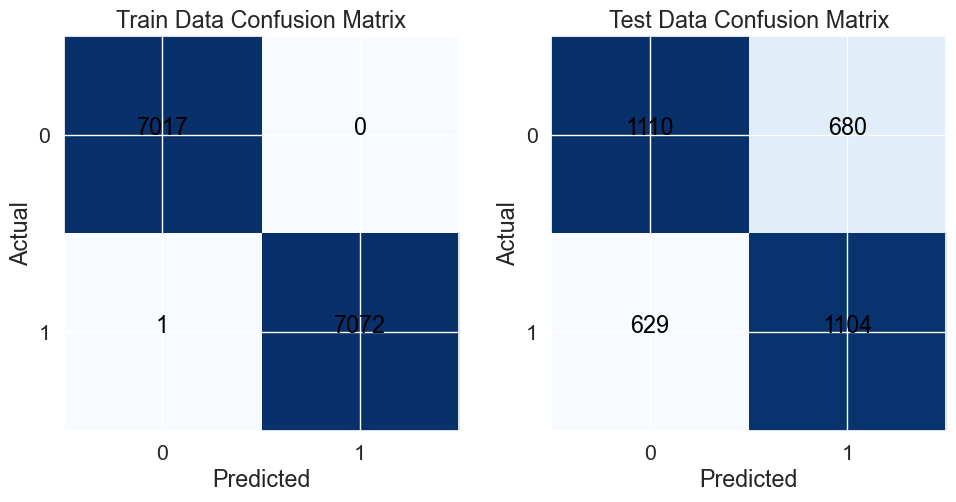

In [81]:
import matplotlib.pyplot as plt
train_matrix = matrix2
test_matrix = matrix

# Define the color map
cmap = plt.cm.Blues

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for training data
axs[0].imshow(train_matrix, interpolation='nearest', cmap=cmap)
axs[0].set_title('Train Data Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
tick_marks = np.arange(len(train_matrix))
axs[0].set_xticks(tick_marks)
axs[0].set_yticks(tick_marks)
thresh = train_matrix.max() / 2.0
for i, j in np.ndindex(train_matrix.shape):
    axs[0].text(j, i, format(train_matrix[i, j], 'd'),
                horizontalalignment="center",
                color="black")

# Plot for test data
axs[1].imshow(test_matrix, interpolation='nearest', cmap=cmap)
axs[1].set_title('Test Data Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')
tick_marks = np.arange(len(test_matrix))
axs[1].set_xticks(tick_marks)
axs[1].set_yticks(tick_marks)
thresh = test_matrix.max() / 2.0
for i, j in np.ndindex(test_matrix.shape):
    axs[1].text(j, i, format(test_matrix[i, j], 'd'),
                horizontalalignment="center",
                color="black")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [52]:
Y_1 = wybrany.predict(X_test)
print(classification_report(y_test, Y_1))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1790
           1       0.56      0.57      0.57      1733

    accuracy                           0.57      3523
   macro avg       0.57      0.57      0.57      3523
weighted avg       0.57      0.57      0.57      3523



In [46]:
#cros val score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(wybrany,X, y, cv=5)
print(scores)
print(scores.mean())

[0.56996878 0.52739143 0.60459835 0.57438955 0.54486087]
0.5642417967882994


In [82]:
#wykres istotnosci zmiennych
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

feature_scores = pd.Series(wybrany.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores


Duration_ms         0.221733
Loudness            0.147274
Acousticness        0.109867
Valence             0.092236
Energy              0.077501
Speechiness         0.071090
Liveness            0.067455
Tempo               0.066196
Danceability        0.065973
Instrumentalness    0.063923
Key                 0.016753
dtype: float64

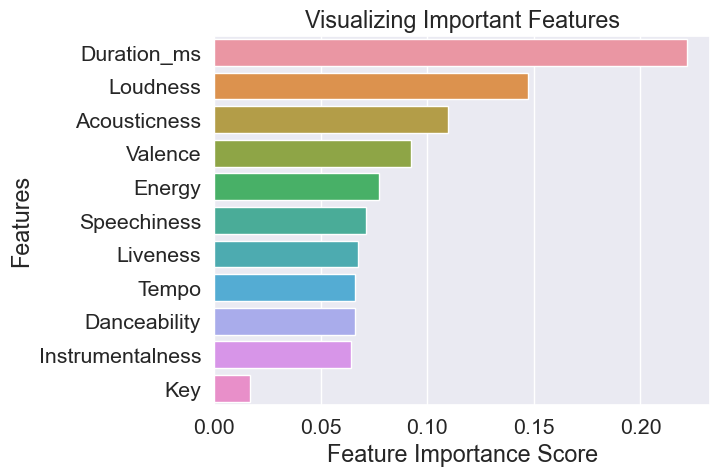

In [83]:
# Add labels to the graph
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [44]:
print(classification_report(y_test, Y_1))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1790
           1       0.56      0.57      0.57      1733

    accuracy                           0.57      3523
   macro avg       0.57      0.57      0.57      3523
weighted avg       0.57      0.57      0.57      3523



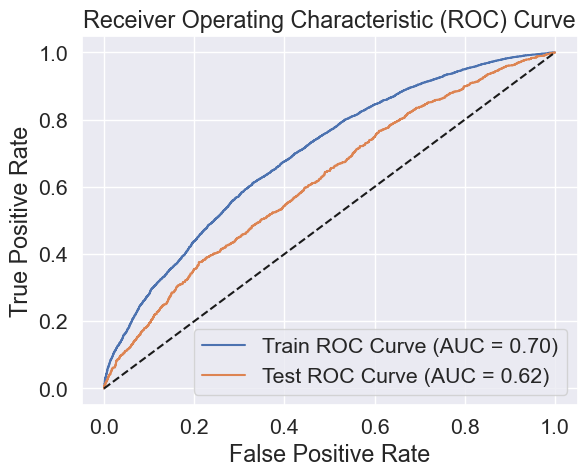

In [85]:
from sklearn.metrics import roc_curve, auc

train_probs = wybrany.predict_proba(X_train)[:, 1]
test_probs = wybrany.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)

# Calculate the area under the ROC curve (AUC)
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot the ROC curve
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [93]:
#scoring modelu
X_scoring = df_scoring.drop(columns=['Stream_Above_Median', 'Stream'])
y_scoring = df_scoring['Stream_Above_Median']

# Predict using the model
scoring_predictions = wybrany.predict(X_scoring)


# Convert predictions to binary labels
scoring_predictions = [1 if p > 0.5 else 0 for p in scoring_predictions]

# Calculate the percentage of correct predictions
accuracy = accuracy_score(y_scoring, scoring_predictions)

print(f'The model correctly predicted {accuracy * 100:.2f}% of the examples in df_scoring.')

The model correctly predicted 61.50% of the examples in df_scoring.
